# SHAHZADI V

## O2 SATURATION

## Objective:

    Do classification(Diseased or Not Diseased) on this data and choose the best model with highest accuracy.

## Description:

    The goal of this project is to predict the binary output.Whether the patient has  disease or not.

    It is well known that the libraries available in Python for data loading, management, and building models, such as Pandas, NumPy, and Scikit-Learn, help build robust data science applications. However, when dealing with medical data in data science, data privacy and protection are important parameters that cannot be ignored.With Python programming language, cybersecurity professionals can efficiently accomplish these aspects in healthcare projects. Beyond data science, Python is also widely used for decoding and sending packets, network scanning, accessing servers, analyzing web traffic, and port scanning.

    Best Machine learning approaches for Heart disease prediction are:
    1.Logistic Regression
    2.Random Forest
    3.Decision Tree
    4.K-Nearest Neighbours
    5.Support Vector Machine

    By performing this 6 techniques we will choose the best model for predict o2 saturation.

     HEART DATA DICTIONARY:

    age : age of persons
    sex : gender of persons
    cp : chest pain type (4 values)
    trtbps : resting blood pressure
    chol : serum cholestrol in mg/dl
    fbs : fasting blood sugar > 120 mg/dl
    restecg : resting electrocardio results(values 0,1,2)
    thalach : maximum heart rate achieved
    exng : exercise induced angina
    oldpeak : ST depression induced by exercise relative to rest
    slp : the slope of the peak exercise ST segment
    caa : number of major vessels(0-3) colored by flourosopy
    thall : 0=normal, 1=fixed defect, 2 = reversable defect
    output : Target column, 1 = Diseased, 0 = Not Diseased

### Importing the libraries

In [74]:
# importing all necessary libraries

# loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA
from collections import Counter

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Data modelling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### Data collection and processing

In [75]:
# loading the csv data to a pandas dataframe
heart_data = pd.read_csv(r'C:\Users\shafe\Desktop\capstone project\heart.csv')
o2_data = pd.read_csv(r'C:\Users\shafe\Desktop\capstone project\o2saturation.csv')

In [76]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [77]:
# number of rows and columns in the dataset
o2_data.shape

(3585, 1)

In [78]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
o2_data

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [80]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [81]:
# checking for missing values
o2_data.isnull().sum()

98.6    0
dtype: int64

In [82]:
# connecting heart_data and o2_data
data = pd.concat([heart_data,o2_data])

In [83]:
# number of rows and columns in the dataset
data.shape

(3888, 15)

In [84]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,NaN
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,NaN
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,NaN
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,NaN
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [85]:
# print first 5 rows of the dataset
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,NaN
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,NaN
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,NaN
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,NaN
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,NaN


In [86]:
# print the last 5 rows of the dataset
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [87]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    float64
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
 14  98.6      3585 non-null   float64
dtypes: float64(15)
memory usage: 486.0 KB


In [88]:
# statistical measures of the data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [89]:
# checking the distribution of output variable
data['output'].value_counts()

1.0    165
0.0    138
Name: output, dtype: int64

1 - diseased


0 - not diseased

## Finding the missing values

In [90]:
data.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
3581,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
3582,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
3583,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


    Here NAN values are denoted as True

In [91]:
# checking for missing values
data.isnull().sum()

age         3585
sex         3585
cp          3585
trtbps      3585
chol        3585
fbs         3585
restecg     3585
thalachh    3585
exng        3585
oldpeak     3585
slp         3585
caa         3585
thall       3585
output      3585
98.6         303
dtype: int64

In [92]:
data.isnull().sum().sum()

50493

## Filling the missing values

In [93]:
df = data.fillna(value = 0)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,0.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,0.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,0.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,0.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6
3581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6
3582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6
3583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6


In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
98.6        0
dtype: int64

In [95]:
df.isnull().sum().sum()

0

In [96]:
# checking the distribution of output variable
df['output'].value_counts()

0.0    3723
1.0     165
Name: output, dtype: int64

## Heat map

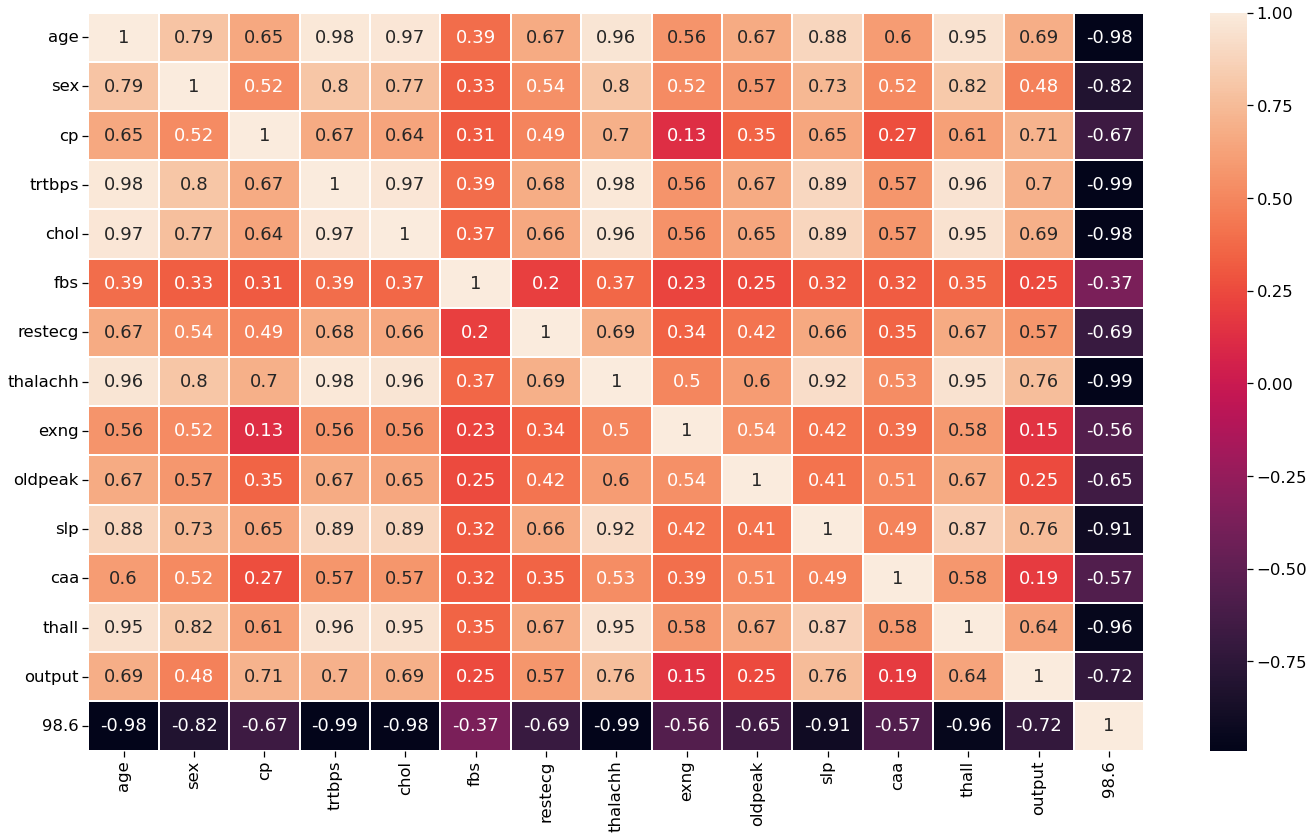

In [97]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.5)
sns.heatmap(df.corr(),annot=True,linewidth = 2)
plt.tight_layout()

    Heat map is plotted to check the correlation between features.

## correlation with output feature by bar graph

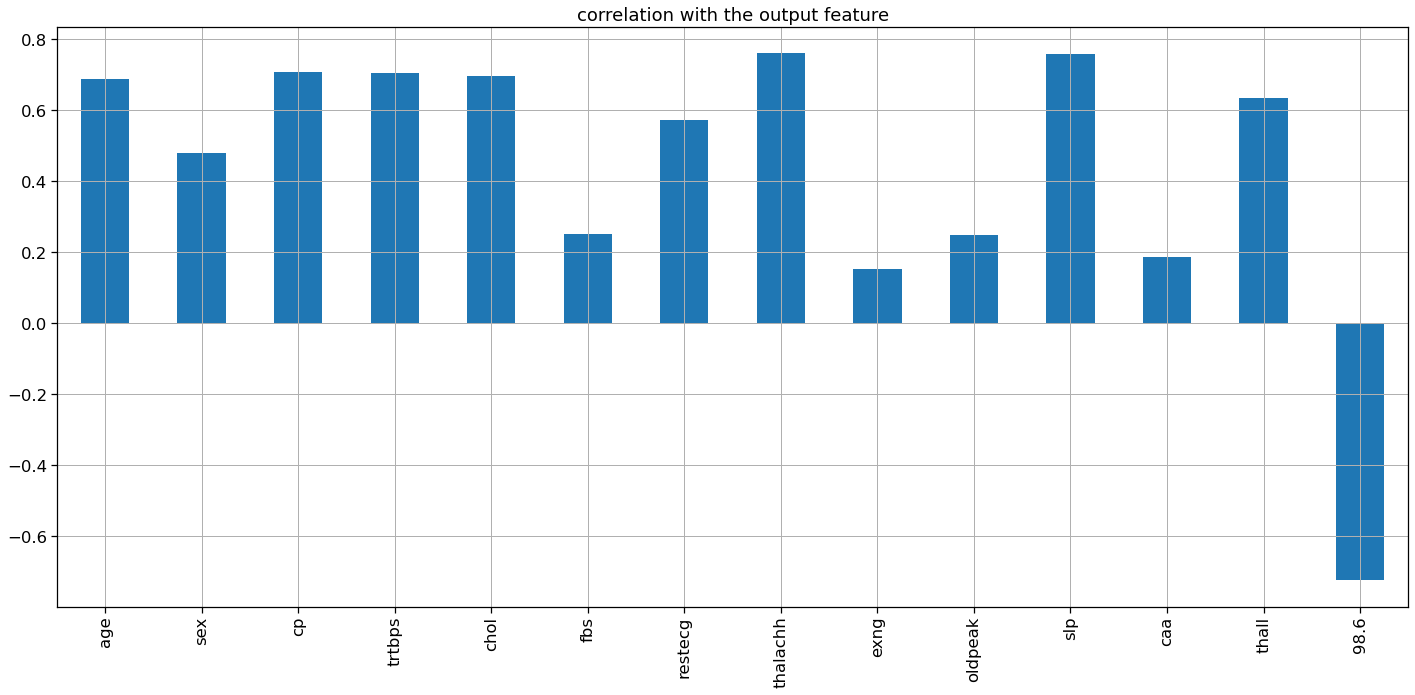

In [98]:
sns.set_context('notebook',font_scale = 1.5)
df.drop('output',axis=1).corrwith(df.output).plot(kind='bar',grid=True,figsize=(20,10),title="correlation with the output feature")
plt.tight_layout()

### Inference

    Four feature (cp,restecg,thalach,slope) are positively correlated with output feature.Other are negatively correlated with output feature.

## sex-age relationship

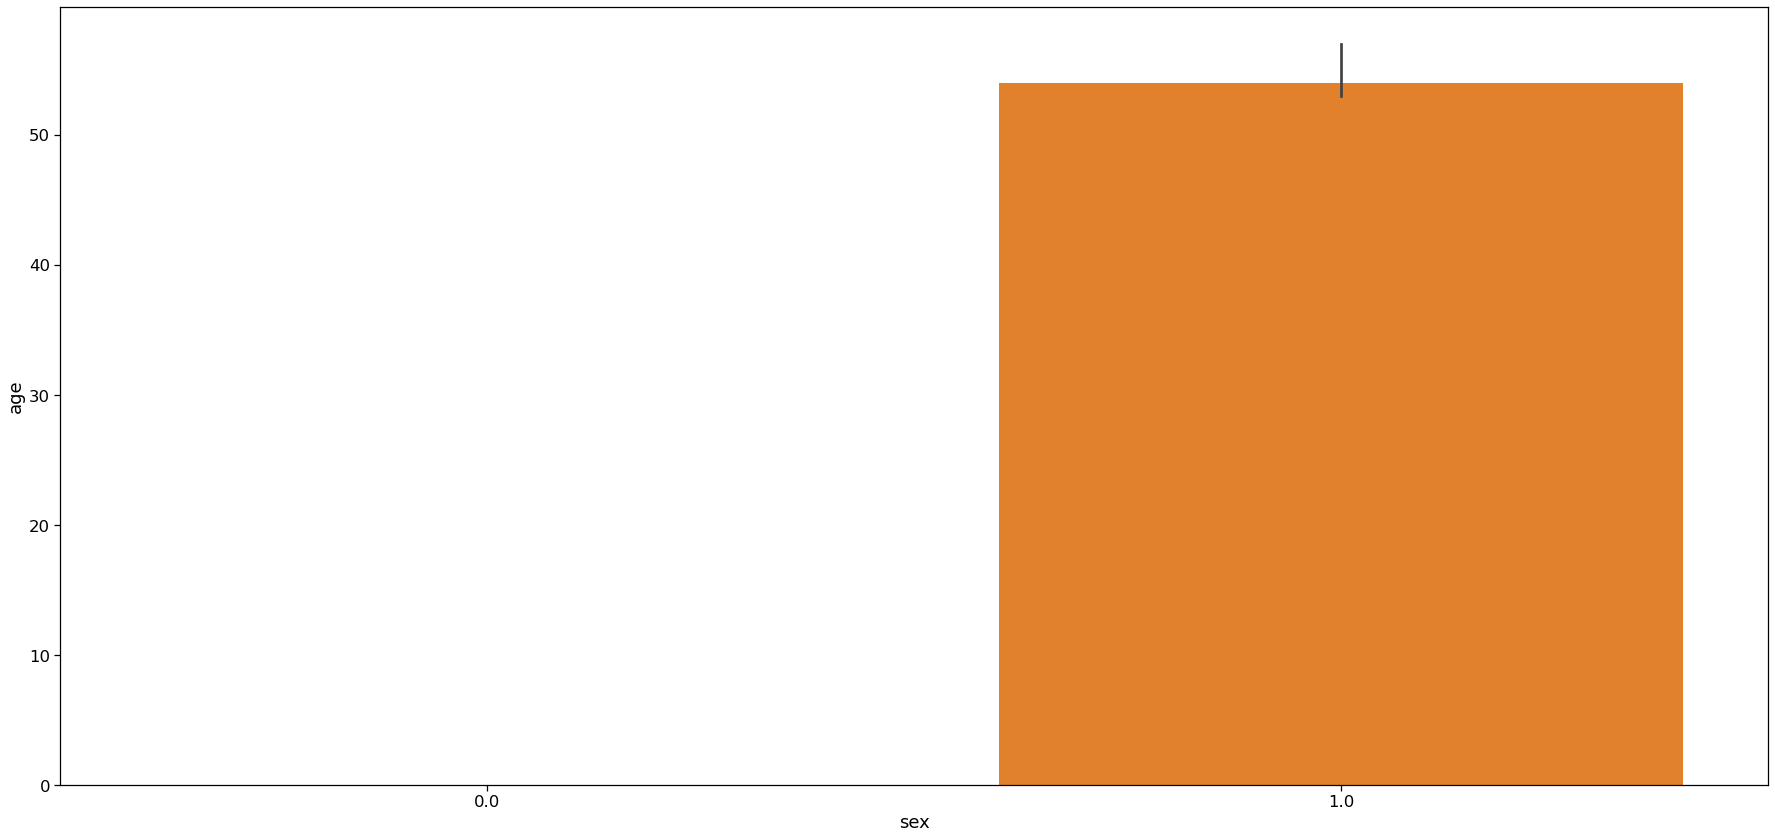

In [99]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x='sex',y='age',data=df,estimator=np.median)
plt.tight_layout()

## sex feature analysis

C:\Users\shafe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


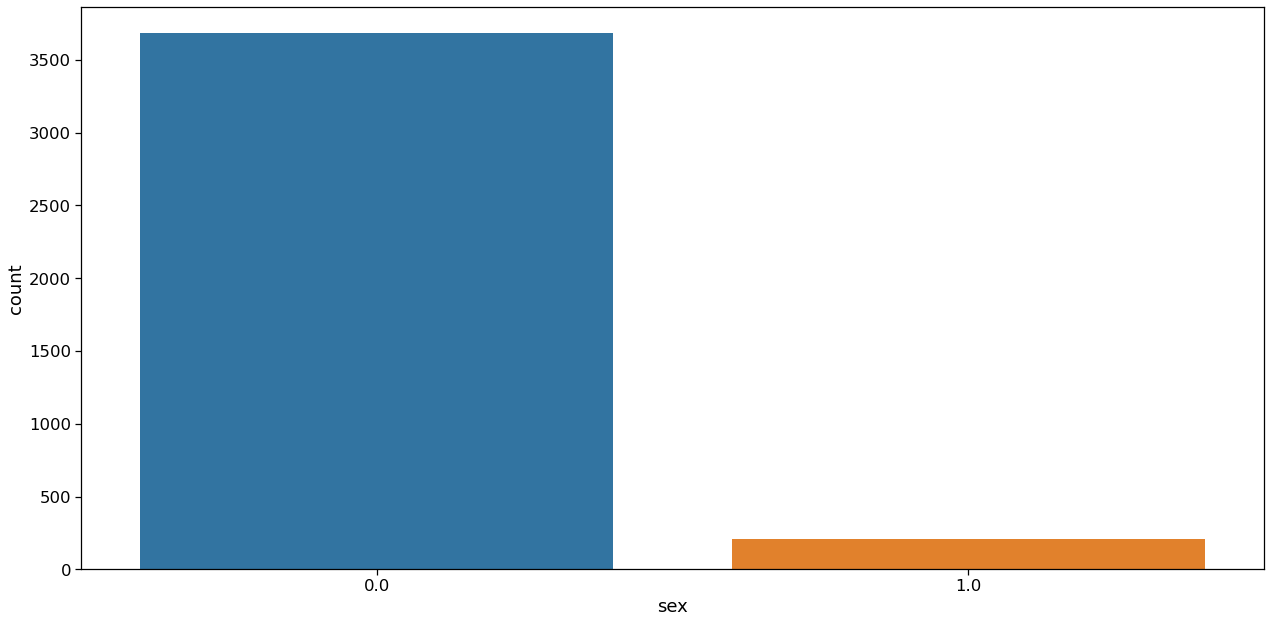

In [100]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'])
plt.tight_layout()

    Here clearly visible that ratio of female to male is approx 2:1

## Chest pain type anlysis

C:\Users\shafe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


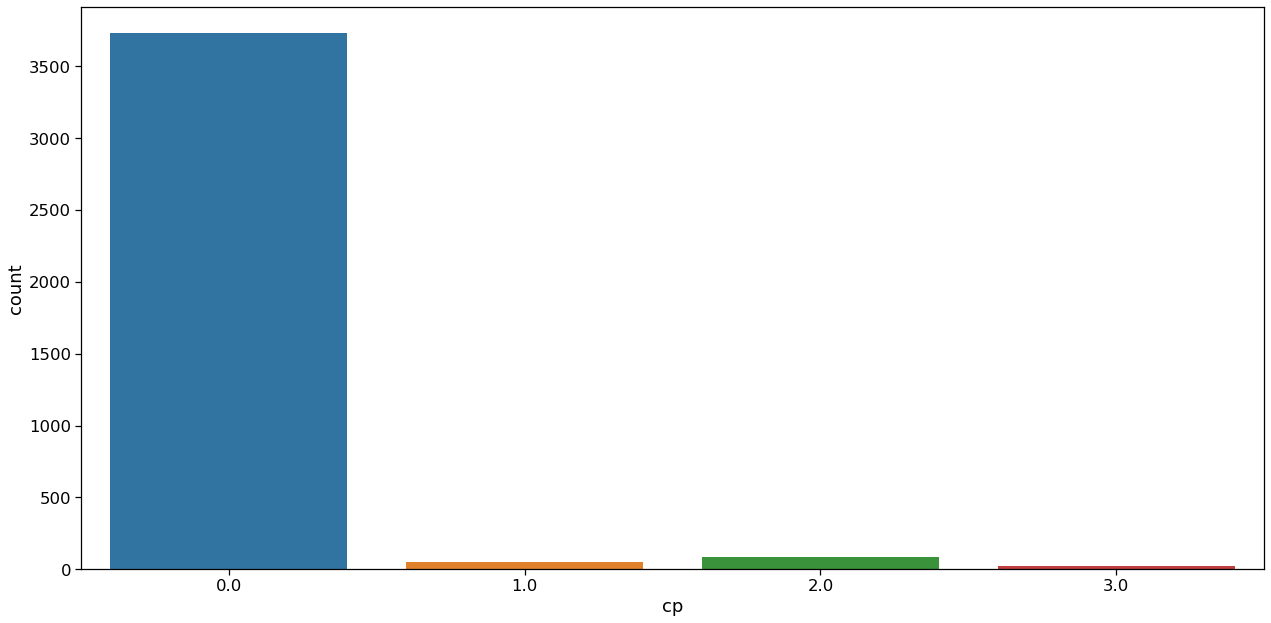

In [101]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'])
plt.tight_layout()

    From this we can say that 4 types of chest pain are there.

## Thall analysis

C:\Users\shafe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


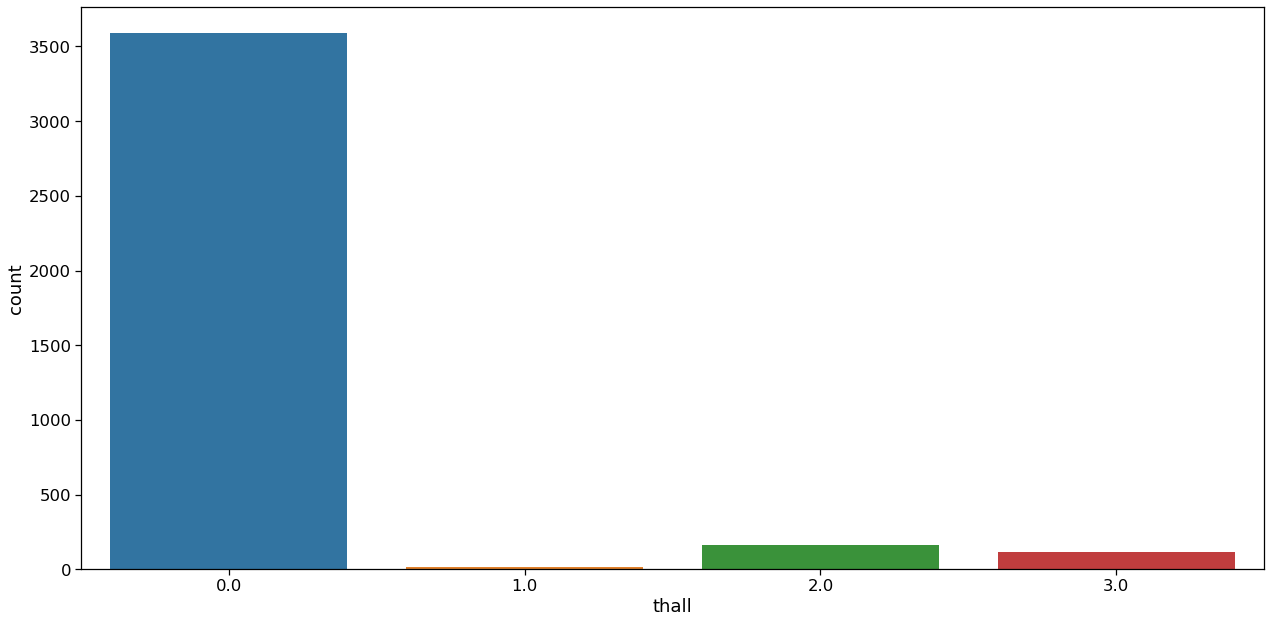

In [102]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['thall'])
plt.tight_layout()


## Output

C:\Users\shafe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


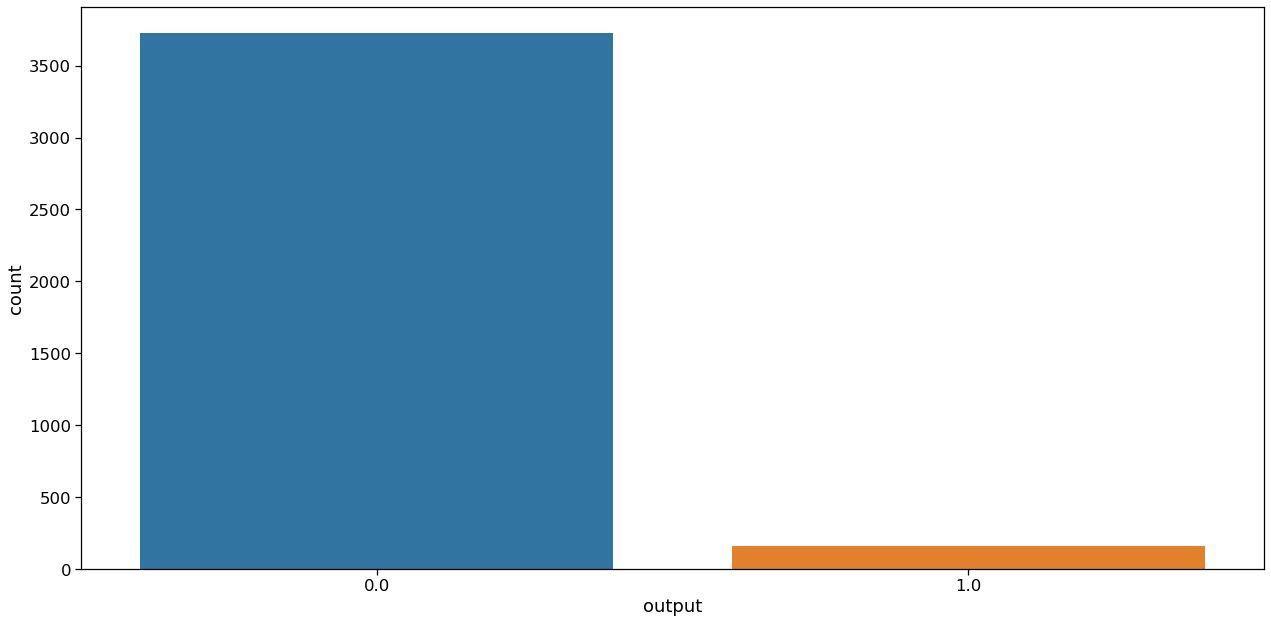

In [103]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['output'])
plt.tight_layout()

## 1 - By using Adaboost Classifier

    Adaptive Boosting(AdaBoost) was perhaps the first successful boosting
    ensemble algorithm. It generally works by weighting instances in the dataset by how easy
    or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the
    construction of subsequent models.

In [104]:
# splitting the features and output
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.5)
results = model_selection.cross_val_score(model,X,Y,cv=kfold)
print("Accuracy:",results.mean())

Accuracy: 0.9745501285347042


## 2 - By using Logistic Regression

    Logistic Regression is a supervised machine learning algorithm used for classification. It produces the outcome in a binary form which is a categorical dependent variable such as: - 0 or 1 - yes or no - high or low - true or fals

### Splitting the features and output

In [106]:
X =df.drop(columns='output',axis=1)
Y = df['output']

In [107]:
print(X)

       age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
0     63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3   
1     37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5   
2     41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4   
3     56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8   
4     57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6   
...    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
3580   0.0  0.0  0.0     0.0    0.0  0.0      0.0       0.0   0.0      0.0   
3581   0.0  0.0  0.0     0.0    0.0  0.0      0.0       0.0   0.0      0.0   
3582   0.0  0.0  0.0     0.0    0.0  0.0      0.0       0.0   0.0      0.0   
3583   0.0  0.0  0.0     0.0    0.0  0.0      0.0       0.0   0.0      0.0   
3584   0.0  0.0  0.0     0.0    0.0  0.0      0.0       0.0   0.0      0.0   

      slp  caa  thall  98.6  
0     0.0  0.0    1.0   0.0  
1  

In [108]:
print(Y)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3580    0.0
3581    0.0
3582    0.0
3583    0.0
3584    0.0
Name: output, Length: 3888, dtype: float64


### Splitting the data into trainig data and test data

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [110]:
X_train.shape

(3110, 14)

In [111]:
X_test.shape

(778, 14)

### Model Training

In [112]:
logreg = LogisticRegression() #logistic regression using python
logreg.fit(X_train,Y_train)

C:\Users\shafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Accuracy score

In [113]:
# accuracy on training data
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [114]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9906752411575562


In [115]:
# accuracy on test data
X_test_prediction = logreg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [116]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9820051413881749


In [117]:
Y_Pred = logreg.predict(X_test) #Predicting the values

In [118]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Pred))
print("Accuracy:",accuracy_score(Y_test,Y_Pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       744
         1.0       0.73      0.94      0.82        34

    accuracy                           0.98       778
   macro avg       0.86      0.96      0.91       778
weighted avg       0.99      0.98      0.98       778

Accuracy: 0.9820051413881749


## 3 - By using K-NN:

    As the name says, a k neighbors classifier takes a data point and finds k other data points nearest to it in the vector space. In a supervised fashion, KNN creates clusters of the data samples having the same target value. Whenever a new value needs to be classified, it uses a distance metric to assign it to one of the classes. For heart disease detection, there are only two classes that KNN needs to build. Thus, it is pretty robust and efficient for this task. Euclidean distance is one of the popular distance metrics used by KNN, but there are many more available. However, the metric choice also impacts the classifier's speed For larger datasets, KNN is already relatively slower than its contemporaries.

### Splitting dataset

In [119]:
X =df.drop(columns='output',axis=1)
Y = df['output']

### Splitting the data into trainig data and test data

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

### Model training & evaluation

#### Accuracy score

In [121]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,Y_train)
Y_pred1 = knn.predict(X_test)
print("Accuracy=",accuracy_score(Y_test,Y_pred1))

Accuracy= 0.9622964867180805


## 4 - By using Random Forest:

    The random forest algorithm provides flexibility and robustness for classification tasks using tabular data, which few other standard models can. Given its simplicity and versatility, the random forest classifier is widely used for fraud detection, loan risk prediction, and predicting heart diseases.

### splitting dataset

In [122]:
X =df.drop(columns='output',axis=1)
Y = df['output']

### splitting data into training data and test data

In [123]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Model training

In [124]:
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,Y_train)

RandomForestClassifier()

### Model evaluation

#### Accuracy score

In [125]:
Y_pred = clf1.predict(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))

[[738  10]
 [  0  30]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       748
         1.0       0.75      1.00      0.86        30

    accuracy                           0.99       778
   macro avg       0.88      0.99      0.93       778
weighted avg       0.99      0.99      0.99       778

Accuracy: 0.987146529562982


## 5 - By using Support vector machine:

    A Support Vector Machine (SVM) algorithm is a non-probabilistic classifier aiming to generate hyperplanes that divide the data points of two classes in the vector space. For N number of features and M targets, SVM creates M-1 N-dimensional hyperplanes that separate data points of different classes from each other. The image below shows how "support" vectors are calculated such that the margin (or distance) between the vectors of two classes is the most. SVM optimizes this margin metric to find the best hyperplane for all the categories.

### splitting dataset:

In [127]:
X =df.drop(columns='output',axis=1)
Y = df['output']

### splitting data into training data and test data

In [128]:
X_train,X_test,Y_tain,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

### model training

In [129]:
from sklearn.svm import SVC
svclf = SVC()
svclf.fit(X_train,Y_train)

SVC()

In [130]:
X_test.shape

(778, 14)

### Model evaluation

In [131]:
Y_pred = svclf.predict(X_test)

In [132]:
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Accuracy score 

In [133]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))

[[744   0]
 [ 34   0]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       744
         1.0       0.00      0.00      0.00        34

    accuracy                           0.96       778
   macro avg       0.48      0.50      0.49       778
weighted avg       0.91      0.96      0.93       778

Accuracy: 0.9562982005141388


C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  6 - By using Decision Tree:

    Decision Trees are the individual models that make a random forest after ensembling. Each decision tree classifier uses the dataset's attributes to create a tree. As shown in the image below, the branches end up in the leaves that are made up of target values. Using visual components and an information gain index, the tree identifies the leading features of the labels of each class. Thus, the branches are created that maximize the information gained in each split and lead up to the leaf node of that class. Decision trees are fast and robust for disease prediction if the dataset has powerful features for a simple use-case.

### splitting dataset

In [134]:
X =df.drop(columns='output',axis=1)
Y = df['output']

In [135]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


### Model training

In [136]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

### Model evaluation

In [137]:
Y_pred = clf.predict(X_test)

In [138]:
Y_pred

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Accuracy score

In [139]:
print(classification_report(Y_test,Y_pred))
print('\nAccuracy: {0:2f}'.format,accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       744
         1.0       0.67      0.71      0.69        34

    accuracy                           0.97       778
   macro avg       0.83      0.84      0.84       778
weighted avg       0.97      0.97      0.97       778

<built-in method format of str object at 0x00000259F67308F0> 0.9717223650385605


## Building a predictive system

    Prediction is done by the help of logistic regression classifier

##  O2 saturated

In [140]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person is not O2 saturated")
else:
    print("The person is O2 saturated")

[1.]
The person is O2 saturated


C:\Users\shafe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Normal case

In [141]:
input_data = (0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person is not O2 saturated")
else:
    print("The person is O2 saturated")

[0.]
The person is not O2 saturated


C:\Users\shafe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# CONCLUSION

    From this 6 machine learning approaches we can select the best model by comparing accuiracies.so we can conclude that best model is provided by Random Forest Classifier.Accuracy is 98%

Others accuracy are:
    
    Accuracy of KNN: 96% 
    
    Accuracy of Logical Regression: 97.2%
    
    Accuracy of SVM: 95%
    
    Accuracy of Decision tree: 97% 
    
    Accuracy of ADA boost: 97%